### Transfer Learning Using ResNet50

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [25]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam

#### Dataset category

In [4]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

#### Load dataset

In [5]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data() 

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
Y_train[100].squeeze()

array(8, dtype=uint8)

(-0.5, 31.5, 31.5, -0.5)

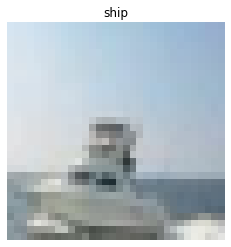

In [9]:
plt.imshow(X_train[100])
plt.title(name_list[Y_train[100].squeeze()])
plt.axis('off')

In [10]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

### Set up Model

In [32]:
New_model = Sequential()

#### ResNet50

In [33]:
New_model.add(ResNet50(include_top=False, input_shape=(32, 32, 3), pooling="avg")) # include_top = False remove classifier part of the network

#### Our own layer

In [34]:
New_model.add(Dense(units=100, activation='relu'))
New_model.add(Dense(units=100, activation='relu'))
New_model.add(Dense(units=10, activation='softmax'))

#### freeze weights

In [36]:
for layers in Resnet_model.layers:
  layers.trainable = False

In [37]:
New_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_6 (Dense)              (None, 100)               204900    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 23,803,722
Trainable params: 23,750,602
Non-trainable params: 53,120
_________________________________________________________________


In [40]:
New_model.compile(loss='categorical_crossentropy', optimizer="sgd",metrics=['categorical_accuracy'])

In [42]:
History = New_model.fit( X_train, Y_train, batch_size=150, epochs=5, validation_data=(X_test, Y_test) )

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 2490s 50ms/sample - loss: 0.6545 - categorical_accuracy: 0.7812 - val_loss: 3.0909 - val_categorical_accuracy: 0.1141
Epoch 2/5
50000/50000 [==============================] - 2347s 47ms/sample - loss: 0.5676 - categorical_accuracy: 0.8083 - val_loss: 1.8013 - val_categorical_accuracy: 0.4740
Epoch 3/5
50000/50000 [==============================] - 2403s 48ms/sample - loss: 0.5156 - categorical_accuracy: 0.8248 - val_loss: 0.6657 - val_categorical_accuracy: 0.7759
Epoch 4/5
50000/50000 [==============================] - 2213s 44ms/sample - loss: 0.4665 - categorical_accuracy: 0.8409 - val_loss: 0.6611 - val_categorical_accuracy: 0.7806
Epoch 5/5
50000/50000 [==============================] - 2379s 48ms/sample - loss: 0.4257 - categorical_accuracy: 0.8548 - val_loss: 0.6280 - val_categorical_accuracy: 0.7939


### Result

In [43]:
result = New_model.predict_classes(X_test)

神經網路預測是: automobile


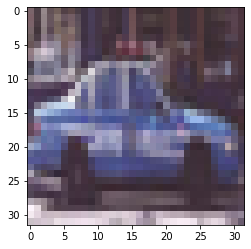

In [51]:
n=1569
print('神經網路預測是:', name_list[result[n]])
# print('真正的答案是:', [y_test[n]])
plt.imshow(X_test[n].reshape(32,32,3))

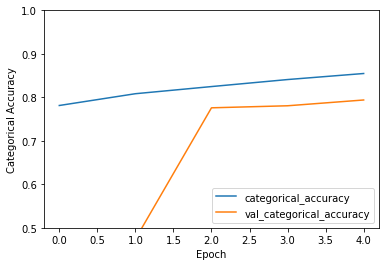

In [52]:
plt.plot(History.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(History.history['val_categorical_accuracy'], label = 'val_categorical_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Categorical Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

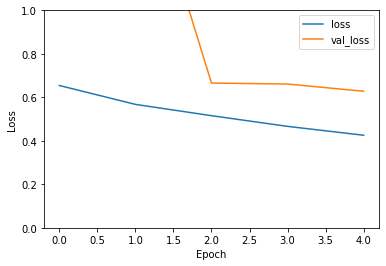

In [53]:
plt.plot(History.history['loss'], label='loss')
plt.plot(History.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')

Epoch 1/16
196/196 [==============================] - 12s 61ms/step - loss: 2.1159 - categorical_accuracy: 0.1994 - val_loss: 6.0142 - val_categorical_accuracy: 0.1000
Epoch 2/16
196/196 [==============================] - 12s 59ms/step - loss: 1.6363 - categorical_accuracy: 0.3716 - val_loss: 2.4109 - val_categorical_accuracy: 0.1905
Epoch 3/16
196/196 [==============================] - 12s 60ms/step - loss: 1.2841 - categorical_accuracy: 0.5180 - val_loss: 1.8106 - val_categorical_accuracy: 0.3250
Epoch 4/16
196/196 [==============================] - 12s 60ms/step - loss: 1.3592 - categorical_accuracy: 0.4795 - val_loss: 7.7896 - val_categorical_accuracy: 0.1000
Epoch 5/16
196/196 [==============================] - 12s 60ms/step - loss: 1.2315 - categorical_accuracy: 0.5230 - val_loss: 9.9365 - val_categorical_accuracy: 0.1000
Epoch 6/16
196/196 [==============================] - 12s 60ms/step - loss: 1.0580 - categorical_accuracy: 0.6109 - val_loss: 6.8128 - val_categorical_accuracy: